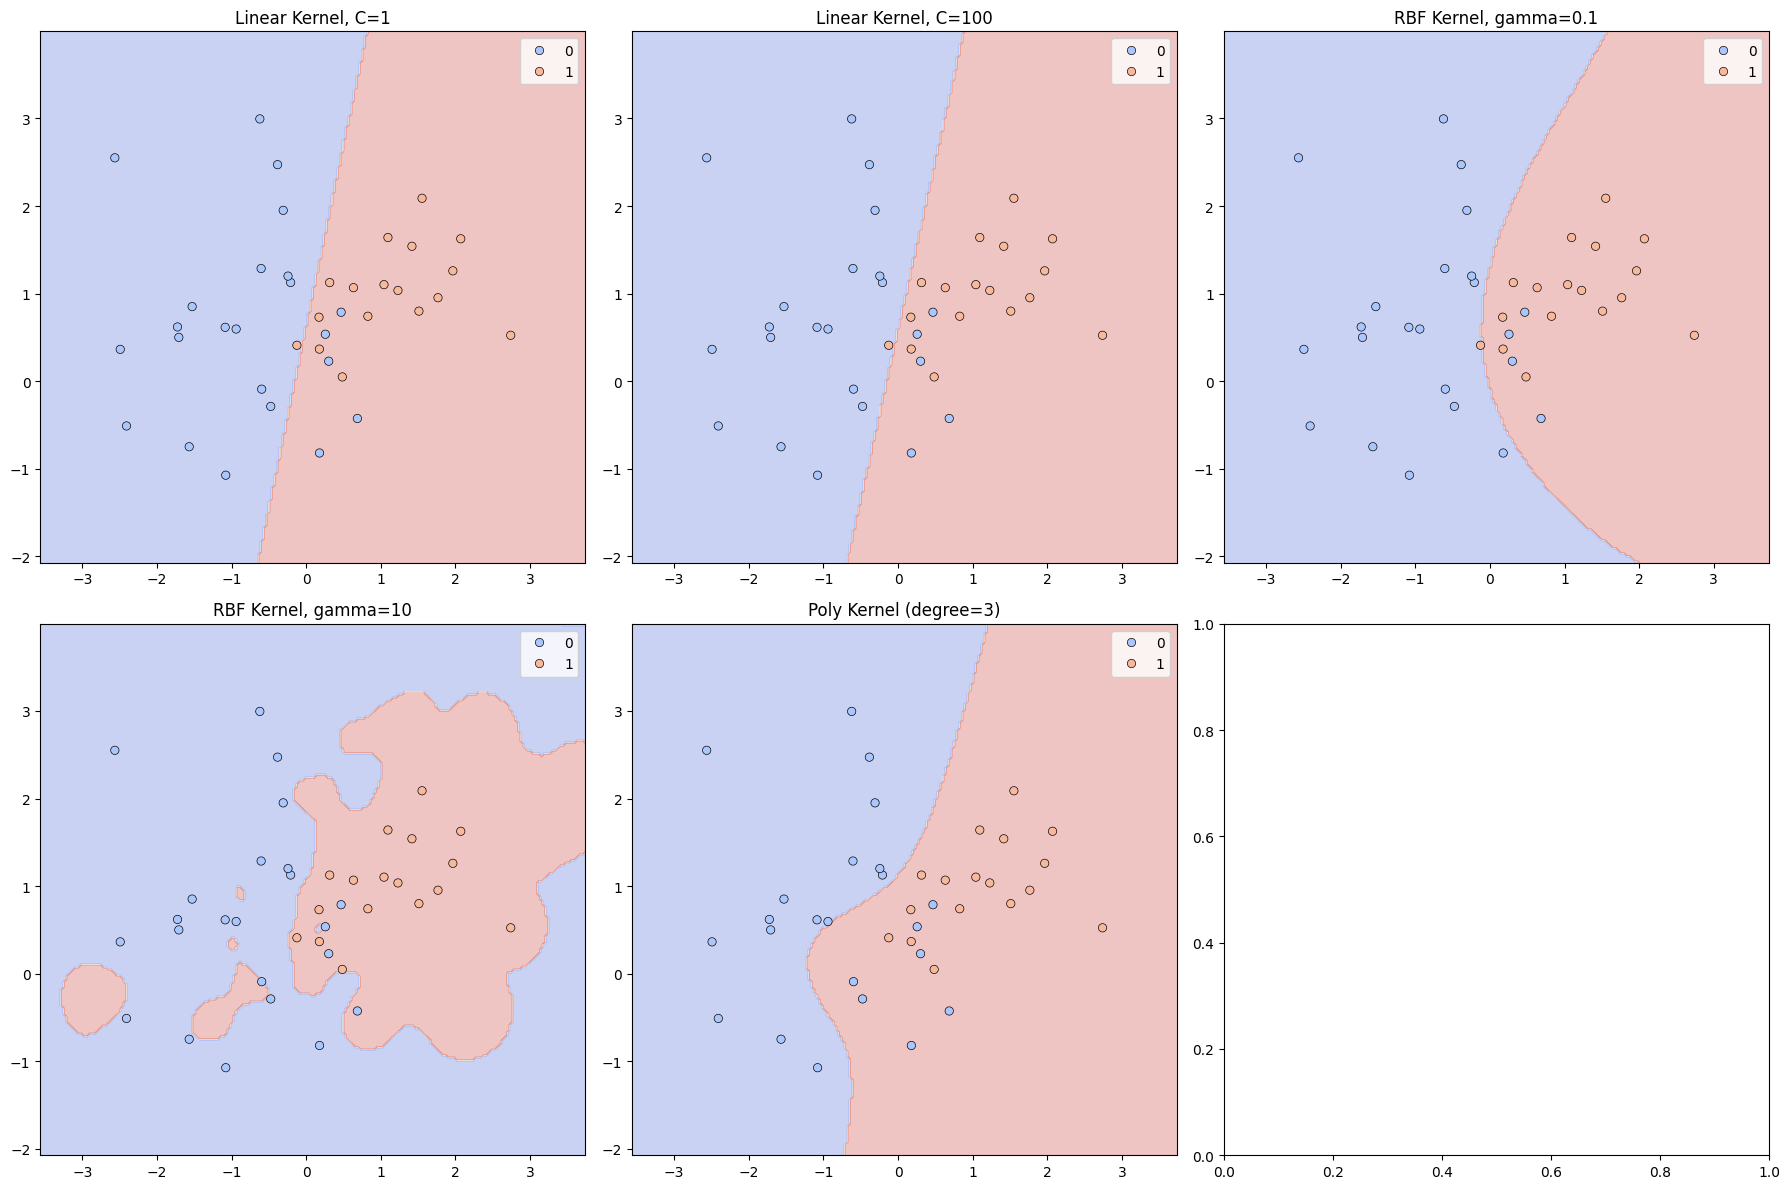

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate synthetic dataset
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define different SVM configurations
svm_configs = [
    ('Linear Kernel, C=1', svm.SVC(kernel='linear', C=1)),
    ('Linear Kernel, C=100', svm.SVC(kernel='linear', C=100)),
    ('RBF Kernel, gamma=0.1', svm.SVC(kernel='rbf', gamma=0.1, C=1)),
    ('RBF Kernel, gamma=10', svm.SVC(kernel='rbf', gamma=10, C=1)),
    ('Poly Kernel (degree=3)', svm.SVC(kernel='poly', degree=3, C=1)),
]

# Function to plot decision boundaries
def plot_decision_boundary(model, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='coolwarm', edgecolor='k', ax=ax)
    ax.set_title(title)

# Plot all decision boundaries
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, (title, model) in enumerate(svm_configs):
    model.fit(X_train, y_train)
    plot_decision_boundary(model, X_test, y_test, axes[i], title)

plt.tight_layout()
plt.show()

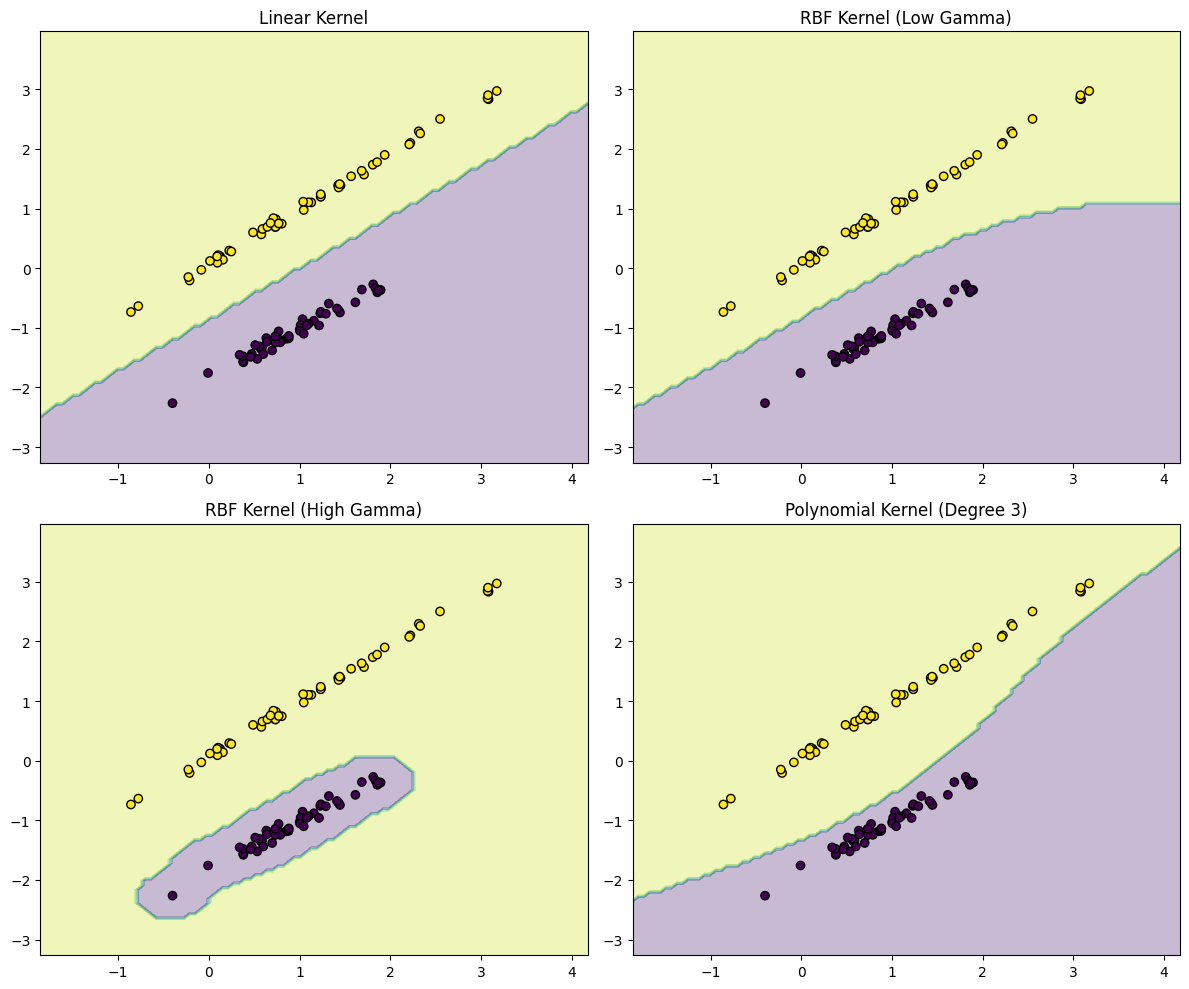

In [ ]:
# Load dataset
X, y = datasets.make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)

# Different SVM configurations
svm_linear = svm.SVC(kernel='linear', C=1).fit(X, y)
svm_rbf_low_gamma = svm.SVC(kernel='rbf', gamma=0.1, C=1).fit(X, y)
svm_rbf_high_gamma = svm.SVC(kernel='rbf', gamma=10, C=1).fit(X, y)
svm_poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X, y)

models = [(svm_linear, 'Linear Kernel'), 
          (svm_rbf_low_gamma, 'RBF Kernel (Low Gamma)'), 
          (svm_rbf_high_gamma, 'RBF Kernel (High Gamma)'), 
          (svm_poly, 'Polynomial Kernel (Degree 3)')]

# Create mesh grid for plotting
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, (model, title) in enumerate(models):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    axes[i].contourf(xx, yy, Z, alpha=0.3)
    axes[i].scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    axes[i].set_title(title)
    
plt.tight_layout()
plt.show()
